<a href="https://colab.research.google.com/github/chandanasree-145/project-1/blob/main/Loan_prediction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:

import pandas as pd

In [128]:
df = pd.read_csv("train.csv")

In [129]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [130]:
df.size

7982

In [131]:
df.shape

(614, 13)

# Preprocessing
1)Filling the missing values

2)Converting the categorical values into numerical values

3)Bring all variables in range of 0 and 1

In [132]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [133]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [134]:
#filling missing values of categorical values with mode-check
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["Married"].fillna(df["Married"].mode()[0], inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].mode()[0], inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace=True)

In [81]:
#filling missing values of continuos values with mean-check
#df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)


In [135]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [136]:
#converting catogeries into numbers using map function-check
df["Gender"]=df["Gender"].map({"Male":0, "Female":1})
df["Married"]=df["Married"].map({"No":0, "Yes":1})
df["Education"]=df["Education"].map({"Not Graduate":0, "Graduate":1})
df["Dependents"]=df["Dependents"].map({"0":0, "1":1, "2":2, "3+":3})
df["Self_Employed"]=df["Self_Employed"].map({"No":0, "Yes":1})
df["Property_Area"]=df["Property_Area"].map({"Rural":0, "Urban":2, "Semiurban":1})
df["Loan_Status"]=df["Loan_Status"].map({"N":0, "Y":1})




In [137]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [138]:
#Bringing all thevariables in range of 0 to 1
df['Dependents']=(df['Dependents']-df['Dependents'].min())/(df['Dependents'].max()-df['Dependents'].min())

In [139]:
for i in df.columns[1:]:
  df[i]=(df[i]-df[i].min())/(df[i].max()-df[i].min())

In [ ]:
df.head(5)

In [141]:
df.to_csv('Loan_prediction_analysis_data.csv', index=False)

In [210]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

1. Loading the dataset

In [211]:
data = pd.read_csv('Loan_prediction_analysis_data.csv')

In [ ]:
data.head()

In [ ]:
data.dtypes

In [214]:
#dropping the loanID coloumn
data= data.drop('Loan_ID',axis=1)

In [ ]:
data.shape

In [216]:
#seperating the independent(features) and dependent(target) variable

#storing all the independent variables as X
X=data.drop('Loan_Status', axis=1)

#storing all dependent variable as Y
Y=data['Loan_Status']

In [ ]:
X.shape, Y.shape

2. Creating Training and Validation set


In [218]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,stratify=data['Loan_Status'],random_state=10,test_size=0.2)

In [ ]:
(X_train.shape,Y_train.shape),(X_test.shape,Y_test.shape)

In [220]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import InputLayer, Dense



In [ ]:
X_train.shape

In [ ]:
X_train.shape[1]

In [223]:
#defining input neurons
input_neurons = X_train.shape[1]

output_neurons = 1 #because this is a binary classification and output willbe in the form of yes or No

In [224]:
#define hidden layers and neurons in each layers
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

3. Defining the architecture of the model

In [225]:
#defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1,activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [ ]:
model.summary()

4. Compiling the model(defining loss func, optimizers)

In [227]:
#loss as binary_crossentropy since we have binary classification problem
#optimizer as adam 
#evaluation metric as accuracy

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

5. Training the model

In [ ]:
# passing the independent and dependent features for training set to train the model
# Validation data will be evaluated at the end of each epoch
# setting the epochs as 50
# storing the trained model in model history variable which will be used to utilize the training process

model_history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs= 50)


6. Evaluating model performance on Validation set


In [229]:
#getting predictions for the validation set
prediction = (model.predict(X_test) > 0.5).astype("int32")

In [230]:
#calculating the accuracy on validation set
accuracy_score(Y_test, prediction)

0.8048780487804879

Visualizing the model performance

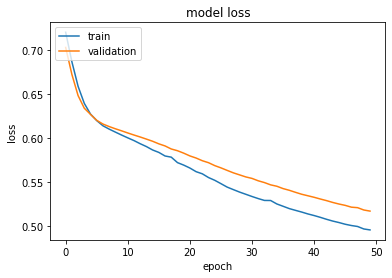

In [231]:
#summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

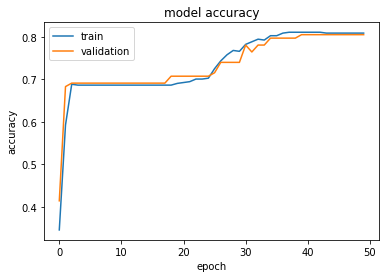

In [232]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()